## Solving UMApHMP with VNS

In [1]:
import sys
from os import listdir
from os.path import isfile, join
import string

import numpy as np
from plot_utils import plot_two_solutions
import matplotlib.pyplot as plt 

from ioutils import parse_input
from utils import get_distance_matrix
from utils import get_discount_matrix
from utils import allocate_paths
from utils import get_nodes
from utils import get_total_cost
from utils import get_flow_from_paths
import cplex_utils
import graph_utils as graph_utils

In [2]:
DATASET = 'AP'
INPUT_DIRECTORY = "./data/AP/"

In [3]:
files = [join(INPUT_DIRECTORY, f) for f in listdir(INPUT_DIRECTORY) if isfile(join(INPUT_DIRECTORY, f))]
print(files)
file = files[0]
print(file)

['./data/AP/10.3', './data/AP/20.3', './data/AP/50.3', './data/AP/10.2', './data/AP/ReadMe-UMApHMP.txt', './data/AP/5.3', './data/AP/25.3', './data/AP/10.5', './data/AP/100.3', './data/AP/200.3', './data/AP/10.4', './data/AP/40.3', './data/AP/Solutions-UMApHMP.txt']
./data/AP/10.3


In [4]:
n, p, alpha, delta, ksi, nodes_coordinates, demand = parse_input(file, DATASET)
nodes = get_nodes(n)
distances = get_distance_matrix(nodes_coordinates)

In [5]:
distances

array([[    0.        , 19961.0558033 , 15695.19654311, 23247.4518241 ,
        23046.6221365 , 30371.32291308, 31577.9646792 , 32743.32891303,
        35819.16331583, 36032.73859423],
       [19961.0558033 ,     0.        , 20191.32685916, 12595.39422727,
        24553.87569785, 18813.21657324, 29874.33691799, 25425.40769452,
        38247.79779951, 30557.93748002],
       [15695.19654311, 20191.32685916,     0.        , 13742.83338584,
         7366.85489253, 18671.4212356 , 15890.65414369, 18296.57531546,
        20875.26188707, 20739.35072549],
       [23247.4518241 , 12595.39422727, 13742.83338584,     0.        ,
        14466.61392728,  7400.71474226, 17776.67905589, 12874.75520832,
        26799.93610028, 17962.84829659],
       [23046.6221365 , 24553.87569785,  7366.85489253, 14466.61392728,
            0.        , 16356.96828587,  8627.19040293, 13047.37025935,
        14115.80625272, 14158.79629089],
       [30371.32291308, 18813.21657324, 18671.4212356 ,  7400.71474226,
   

In [6]:
demand

array([[ 75.45516,  36.99225,  54.50374,  19.26993,  20.09353,  17.65083,
         56.77023,  17.0805 ,  18.83119,  16.3857 ],
       [ 25.79368,  38.37556,  24.9978 ,  26.57622,  18.2892 ,  23.16878,
         38.16187,  20.41213,  12.48278,  16.59752],
       [ 66.81259,  39.3154 ,  51.18631,  22.4085 ,  24.20284,  20.51443,
         70.55825,  20.242  ,  22.99969,  19.42402],
       [ 17.32913,  33.11961,  18.76116,  24.90798,  16.3616 ,  22.92953,
         40.16107,  23.14628,  11.42045,  18.67024],
       [ 17.48542,  25.13702,  21.18277,  19.09304,  23.48038,  18.30631,
         73.40977,  20.08767,  23.88958,  19.43431],
       [ 11.60717,  18.44195,  12.16834,  16.1154 ,  11.117  ,  16.94285,
         37.16685,  21.82894,   9.55635,  18.06635],
       [ 82.3726 ,  77.53514,  90.44923,  67.79197,  95.05794,  72.6356 ,
        312.25879,  98.82669, 110.00666, 110.36841],
       [ 35.14312,  41.73451,  36.29946,  48.41528,  35.71107,  57.57814,
        173.37314,  89.946  ,  41.226

In [7]:
M, X, Y, Z, H = cplex_utils.get_umaphmp_model(n, p, alpha, delta, ksi, distances, demand, formulation='EK', verbose=True)
solution = M.solve(log_output=True)
hubs_bit_mask = [int(solution.get_var_value(H[i])) for i in range(n)]
cplex_objective = round(solution.objective_value, 7)

[2023-07-29 22:59:18,525] Created model M
[2023-07-29 22:59:18,550] Defined variables X
[2023-07-29 22:59:18,574] Defined variables Y
[2023-07-29 22:59:18,577] Defined variables Z
[2023-07-29 22:59:18,577] Defined variables H
[2023-07-29 22:59:18,578] Defined constraints (2)
[2023-07-29 22:59:18,580] Defined constraints (3)
[2023-07-29 22:59:18,588] Defined constraints (4)
[2023-07-29 22:59:18,605] Defined constraints (5)
[2023-07-29 22:59:18,621] Defined constraints (6)
[2023-07-29 22:59:18,638] Defined constraints (7)
[2023-07-29 22:59:18,655] Defined constraints (1)


Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 100 columns.
Reduced MIP has 411 rows, 2010 columns, and 5310 nonzeros.
Reduced MIP has 10 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (1.62 ticks)
Found incumbent of value 5.4035881e+08 after 0.01 sec. (3.81 ticks)
Probing time = 0.00 sec. (0.13 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 411 rows, 2010 columns, and 5310 nonzeros.
Reduced MIP has 10 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.04 ticks)
Probing time = 0.00 sec. (0.13 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.01 sec. (4.54 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integ

In [8]:
Z_allocated = {(i,k): solution.get_var_value(Z[i,k]) for i in range(n) for k in range(n)}
X_allocated = {(i,l,j): solution.get_var_value(X[i,l,j]) for i in range(n) for l in range(n) for j in range(n)}
Y_allocated = {(i,k,l): solution.get_var_value(Y[i,k,l]) for i in range(n) for k in range(n) for l in range(n)}
cplex_flow = cplex_utils.get_flow_from_XYZ(n, X_allocated, Y_allocated, Z_allocated)

In [9]:
hubs, = np.where(hubs_bit_mask)
hubs

array([2, 6, 7])

In [10]:
discounts = get_discount_matrix(n, hubs, alpha, delta, ksi)
discounts

array([[1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 3.  , 1.  , 1.  ],
       [1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 3.  , 1.  , 1.  ],
       [2.  , 2.  , 0.75, 2.  , 2.  , 2.  , 0.75, 0.75, 2.  , 2.  ],
       [1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 3.  , 1.  , 1.  ],
       [1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 3.  , 1.  , 1.  ],
       [1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 3.  , 1.  , 1.  ],
       [2.  , 2.  , 0.75, 2.  , 2.  , 2.  , 0.75, 0.75, 2.  , 2.  ],
       [2.  , 2.  , 0.75, 2.  , 2.  , 2.  , 0.75, 0.75, 2.  , 2.  ],
       [1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 3.  , 1.  , 1.  ],
       [1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 3.  , 1.  , 1.  ]])

In [11]:
paths = allocate_paths(n, hubs, distances, discounts)
paths

[[0, 2, 1],
 [0, 2],
 [0, 2, 3],
 [0, 2, 4],
 [0, 2, 7, 5],
 [0, 2, 6],
 [0, 2, 7],
 [0, 2, 6, 8],
 [0, 2, 7, 9],
 [1, 2, 0],
 [1, 2],
 [1, 2, 3],
 [1, 2, 4],
 [1, 2, 7, 5],
 [1, 2, 6],
 [1, 2, 7],
 [1, 2, 6, 8],
 [1, 2, 7, 9],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [2, 7, 5],
 [2, 6],
 [2, 7],
 [2, 6, 8],
 [2, 7, 9],
 [3, 2, 0],
 [3, 2, 1],
 [3, 2],
 [3, 2, 4],
 [3, 7, 5],
 [3, 7, 6],
 [3, 7],
 [3, 7, 6, 8],
 [3, 7, 9],
 [4, 2, 0],
 [4, 2, 1],
 [4, 2],
 [4, 2, 3],
 [4, 6, 7, 5],
 [4, 6],
 [4, 6, 7],
 [4, 6, 8],
 [4, 6, 9],
 [5, 7, 2, 0],
 [5, 7, 1],
 [5, 7, 2],
 [5, 7, 3],
 [5, 7, 6, 4],
 [5, 7, 6],
 [5, 7],
 [5, 7, 6, 8],
 [5, 7, 9],
 [6, 2, 0],
 [6, 2, 1],
 [6, 2],
 [6, 7, 3],
 [6, 4],
 [6, 7, 5],
 [6, 7],
 [6, 8],
 [6, 9],
 [7, 2, 0],
 [7, 1],
 [7, 2],
 [7, 3],
 [7, 6, 4],
 [7, 5],
 [7, 6],
 [7, 6, 8],
 [7, 9],
 [8, 6, 2, 0],
 [8, 6, 2, 1],
 [8, 6, 2],
 [8, 6, 7, 3],
 [8, 6, 4],
 [8, 6, 7, 5],
 [8, 6],
 [8, 6, 7],
 [8, 6, 9],
 [9, 7, 2, 0],
 [9, 7, 1],
 [9, 7, 2],
 [9, 7, 3],
 [9, 6,

In [12]:
vns_flow = get_flow_from_paths(n, paths, demand)
vns_flow

array([[  0.     ,   0.     , 333.03306,   0.     ,   0.     ,   0.     ,
          0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     , 244.85554,   0.     ,   0.     ,   0.     ,
          0.     ,   0.     ,   0.     ,   0.     ],
       [365.91275, 262.37451,   0.     ,  87.34769, 102.42755,   0.     ,
        219.80401, 171.47591,   0.     ,   0.     ],
       [  0.     ,   0.     ,  85.5715 ,   0.     ,   0.     ,   0.     ,
          0.     , 141.23555,   0.     ,   0.     ],
       [  0.     ,   0.     , 106.37863,   0.     ,   0.     ,   0.     ,
        155.12764,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
          0.     , 173.0112 ,   0.     ,   0.     ],
       [  0.     ,   0.     , 289.798  ,   0.     , 183.90552,   0.     ,
          0.     , 314.11014, 304.28237, 150.17528],
       [  0.     ,  85.14039, 139.74268, 195.25989,   0.     , 293.77677,
        359.73228,   0.     ,   0.   

In [13]:
list(cplex_flow)

[array([  0.     ,   0.     , 333.03306,   0.     ,   0.     ,   0.     ,
          0.     ,   0.     ,   0.     ,   0.     ]),
 array([  0.     ,   0.     , 244.85554,   0.     ,   0.     ,   0.     ,
          0.     ,   0.     ,   0.     ,   0.     ]),
 array([365.91275, 262.37451, 705.36505,  87.34769, 102.42755,   0.     ,
        219.80401, 171.47591,   0.     ,   0.     ]),
 array([ 0.00000000e+00,  0.00000000e+00,  8.55715000e+01, -2.27373675e-13,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.41235550e+02,
         0.00000000e+00,  0.00000000e+00]),
 array([  0.     ,   0.     , 106.37863,   0.     ,   0.     ,   0.     ,
        155.12764,   0.     ,   0.     ,   0.     ]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.27373675e-13,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.73011200e+02,
        0.00000000e+00, 0.00000000e+00]),
 array([ 0.00000000e+00,  0.00000000e+00,  2.89798000e+02, -2.27373675e-13,
         1.83905520e+02,  0.00

In [14]:
cplex_flow[3,5]

0.0

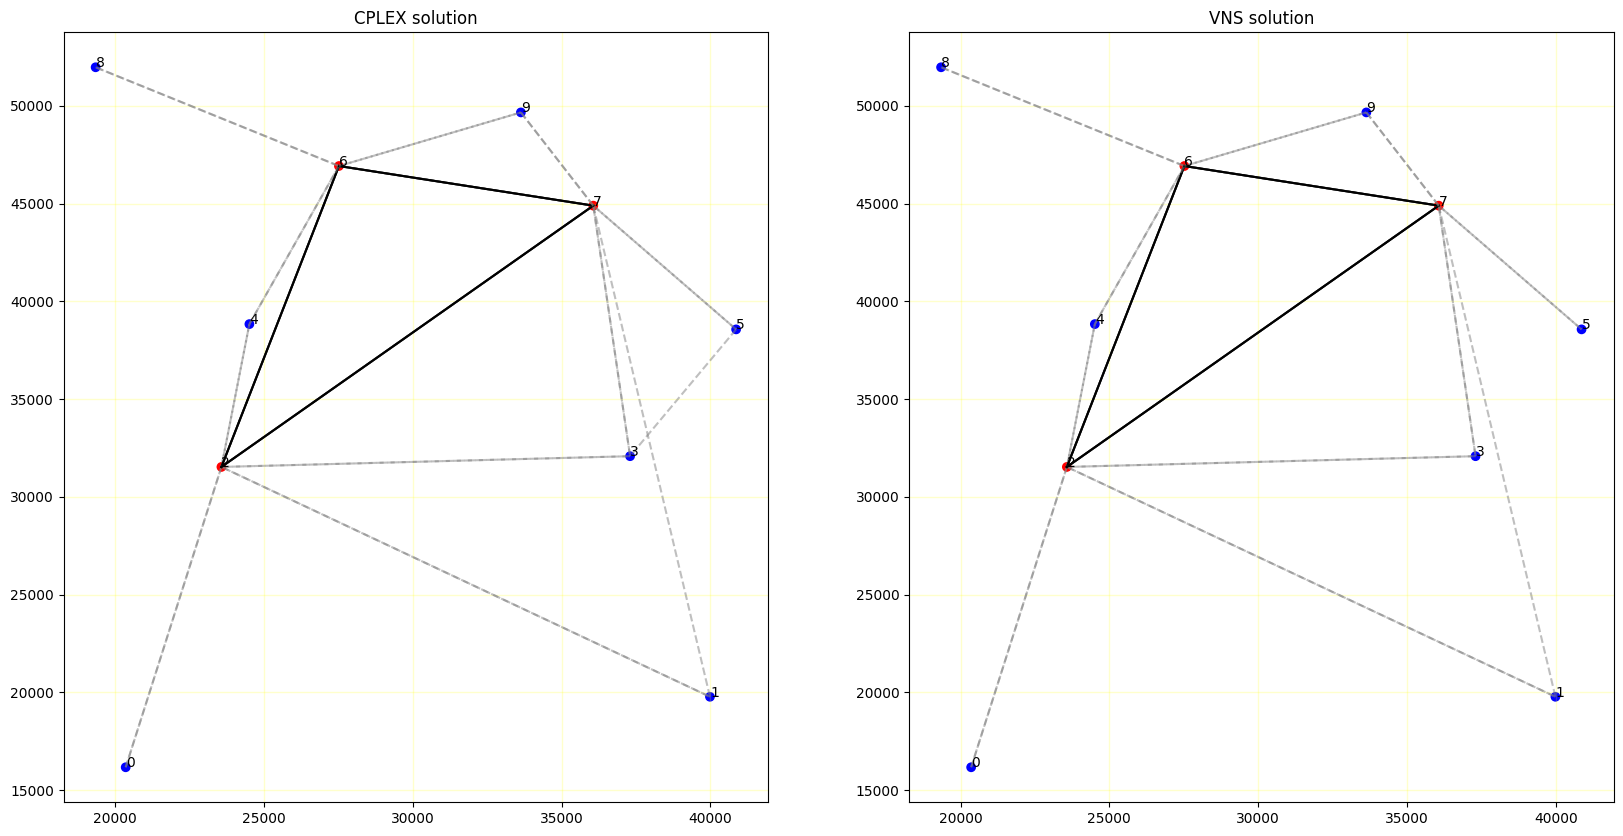

In [21]:
plot_two_solutions(nodes_coordinates, 
                   hubs_bit_mask, 
                   hubs_bit_mask, 
                   cplex_flow, 
                   vns_flow,  
                   title1="CPLEX solution",
                   title2="VNS solution",
                   point_labels='numbers', plot_all_lines=False, verbose=0)

In [16]:
# todo: AP/10.3: why cplex flow (graph on the left) contains non-hub - non-hub edge 3-5 ???
#   because we got some very small non-zero number => we should drop some decimals!
cplex_flow[5,3]

2.2737367544323206e-13

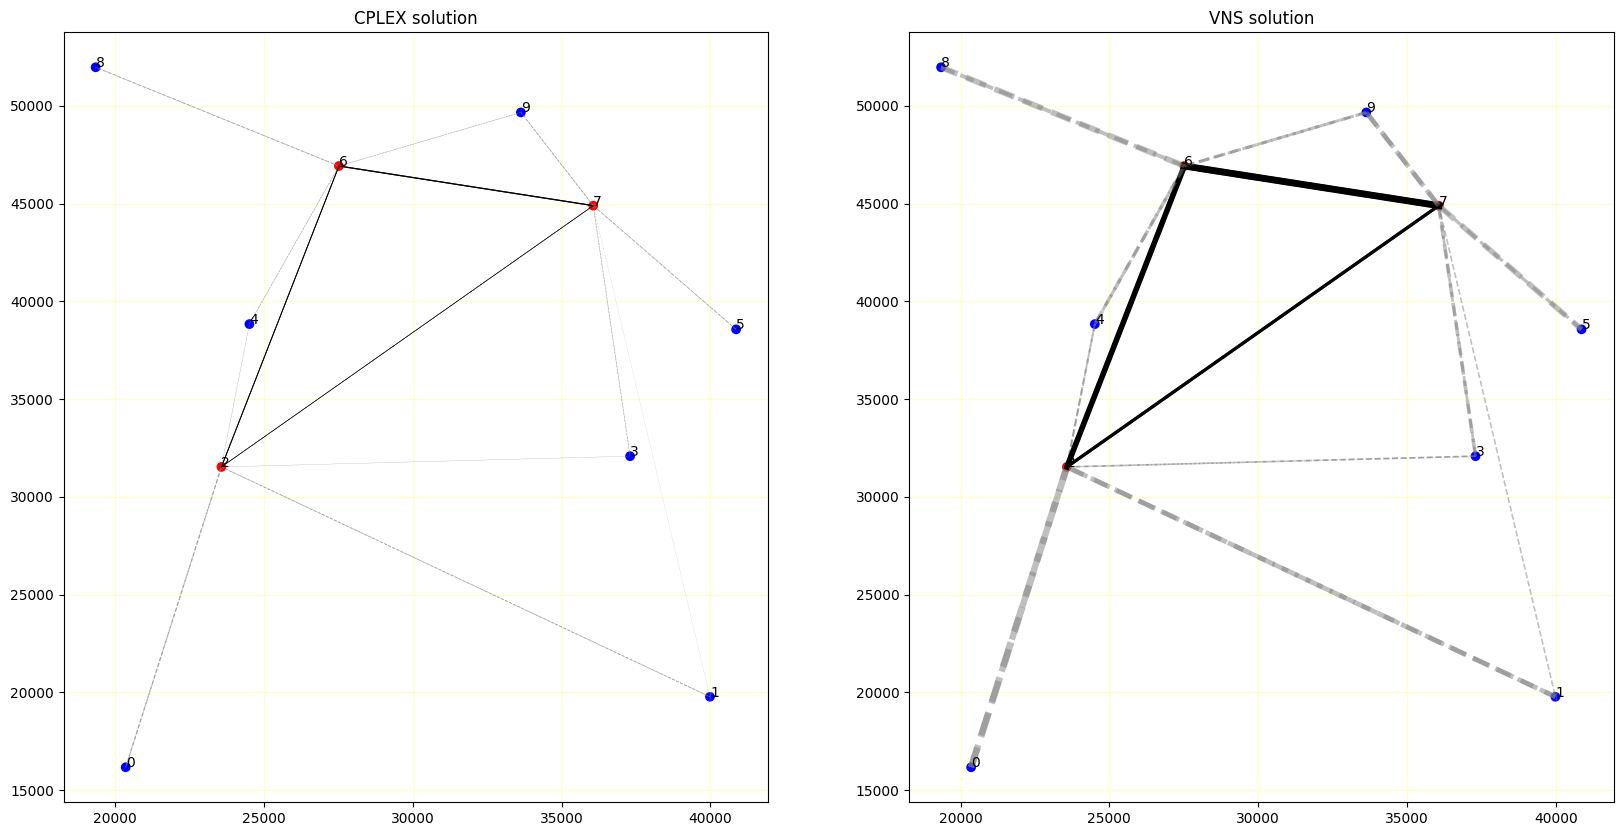

In [23]:
# if I choose that edge tickness represents flow (verbose=2) it's not visible
plot_two_solutions(nodes_coordinates, 
                   hubs_bit_mask, 
                   hubs_bit_mask, 
                   cplex_flow, 
                   vns_flow,  
                   title1="CPLEX solution",
                   title2="VNS solution",
                   point_labels='numbers', plot_all_lines=False, verbose=2)

In [18]:
get_total_cost(vns_flow, distances, discounts)

131581786.946515

In [19]:
get_total_cost(cplex_flow, distances, discounts)

131581786.94651498

In [20]:
cplex_objective

131581786.946515